# Testing a Perceptual Phenomenon : Stroop Effect

Some backGround on stroop effect : 

### 1. What is our independent variable? What is our dependent variable?

###  2. What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Appropriate set of hypotheses for this task are : 
1. H0(Null Hypothesis) : µi = µc, i.e. there is no difference between the congruent and incongruent tasks.
2. Ha(Alternative Hypothesis) :  µi != µc i.e. there is difference between the congruent and incongruent tasks. Or in other words results are not different due to by chance.

where µi = mean time taken for identifying words in congruent condition
and µc = mean time taken for identifying words in incongruent condition.

The two tailed t-Test is the appropriate statistical test as theere are two samples for the same participants for two different conditions. We don't have population information(popultion mean etc.) here so one tailed t-test is not possible. 

### 3. Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [65]:
import pandas as pd, numpy as np
from matplotlib import pyplot as plt
from scipy.stats import t
import math
%matplotlib inline

Let's read the csv data and analyze the shape of data.

In [6]:
df = pd.read_csv('stroopdata.csv')

In [7]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [8]:
df.columns

Index(['Congruent', 'Incongruent'], dtype='object')

In [119]:
n = df.shape[0]
print (n) #sample size

24


Hence there are 24 data points in the shared data sheet.

For finding the central tendency let's measure the ***means*** for congruent and incongruent tests.

In [84]:
print("Mean for Congruent condition is {} and Incongruent condition is {}"
      .format(round(df['Congruent'].mean(),2), round(df['Incongruent'].mean(), 2)))

Mean for Congruent condition is 14.05 and Incongruent condition is 22.02


For finding the measure of variability let's measure the ***variance and standard deviation*** for congruent and incongruent tests.

In [88]:
print("Variance for Congruent condition is {} and Incongruent condition is {}"
      .format(round(df['Congruent'].var(),2), round(df['Incongruent'].var(), 2)))

Variance for Congruent condition is 12.67 and Incongruent condition is 23.01


In [89]:
print("Standard Deviation for Congruent condition is {} and Incongruent condition is {}"
      .format(round(df['Congruent'].std(),2), round(df['Incongruent'].std(), 2)))

Standard Deviation for Congruent condition is 3.56 and Incongruent condition is 4.8


### 4. Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

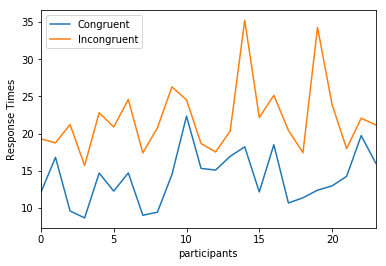

In [90]:
ax = df[['Congruent','Incongruent']].plot(kind='line')
ax.set_xlabel("participants")
ax.set_ylabel("Response Times")

***Plot summary*** : It's obvious looking at the above plot that the response time for incongruent condition is more than that of the congruent condition.

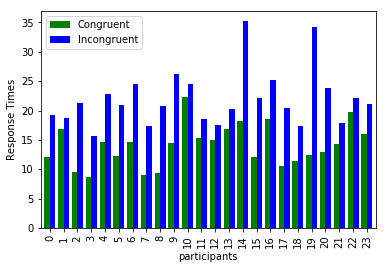

In [91]:
ax = df[['Congruent','Incongruent']].plot(kind='bar', color=["g","b"], width = 0.8)
ax.set_xlabel("participants")
ax.set_ylabel("Response Times")

***Plot summary*** : From the above grouped bar chart also it's clear that the response time for incongruent condition is more than that of the congruent condition.

### 5. Now, perform the statistical test and report your results. What is your confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

Since there are 24 participants (n=24) hence degress of freedom = n-1(23)
we now find the t-critical value for a 95% confidence level and 23 degrees of freedom.

In [118]:
print("{0:.3f}".format(t.ppf(.95, 23))) #get the score using t table method from scipy

1.714


Now if calculated t-score comes higher than this value then we can reject the null hypothesis with 95% confidence.
Let's calculate the t-score.

Now mean difference ***md*** is 

In [103]:
md = df['Incongruent'].mean() - df['Congruent'].mean()
print (round(md, 2))

7.96


Now let's find the standard deivation for the differences for the data points.

In [120]:
coh_diff = round((df['Incongruent'] - df['Congruent']).std(), 2)

In [117]:
t_score = md/(coh_diff/math.sqrt(n))
print(t_score)

8.02867304152


Since t_score is greater the the t-value at 95% confidence score for being in critical region. Hence we can reject the null hypothesis.
Hence the means for congruent and inconruent tasks are not equal and infact mean response time of congruent conditions is lesser than that for inconguent condition. It matches our expectation.